# HR Analytics: Employee Attrition Modelling


In [1]:
# Altering Jupyter NoteBook behavior to display all the variables within a cell NOT just the last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset in Python environment

In [3]:
filename = r"Employee Attrition Data.csv"
employee_data_df = pd.read_csv(filename)

#### Exploratory data analysis (EDA)

In [4]:
# Check the first and last few rows of the dataset. By default head() and tail() show 5 rows/ observations.
employee_data_df.head()
employee_data_df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [5]:
# Check the dimensionality of the dataset
employee_data_df.shape

(1470, 13)

There are 1470 rows/ observations/ records and 13 columns in the dataset. Out of these, the second column - Attrition appears to be the response/target variable. The remaining 12 columns are the features or dimensions for the problem.

In [6]:
# Let's check the data type of various columns.
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


Clearly there are no null values in any of the column. Further, Attrition, Department, Education field, Martial Status are categorical variables with object datatypes. Remaining other are int64.

Also note the target/ response variable is a categorical variable (not a continuous one). Hence We are potentially dealing with supervised learning - classification problem

In [7]:
# Below is the small piece of code to check the different unique values of each categorical variable. This also displays the 
# total number of unique values (BUT not to count of each level within the dataset). For instance, it will not display out of 
# 1470 how many are males.

for i in employee_data_df.columns.tolist():
    if employee_data_df[i].dtype == 'object':
        print()
        print('{} has total {} unique values. These are: \n{}'.format(i, employee_data_df[i].nunique(),
                                                                    employee_data_df[i].unique().tolist()))
    else:
        continue


Attrition has total 2 unique values. These are: 
['Yes', 'No']

Department has total 3 unique values. These are: 
['Sales', 'Research & Development', 'Human Resources']

EducationField has total 6 unique values. These are: 
['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

MaritalStatus has total 3 unique values. These are: 
['Single', 'Married', 'Divorced']


In [8]:
# Let's explore the numeric variables of the dataset

employee_data_df.describe()
# NOTE that describe() by default operates on the numeric datatypes (int, float etc.) and not on objects (str etc.).

employee_data_df.describe(include='all')
# include='all' will show the summary statistics for the all feature including the object ones. NOTE the summary shown is
# different. In case of categorical variables - count, unique, top, frequency for top level is shown; This indicates part of the
# data shown by code in above cell. Likewise include='object' will return summary only for categorical variables.

employee_data_df.describe(include='object')

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,NaN,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,No,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Married,NaN,NaN,NaN,NaN
freq,NaN,1233,961,NaN,NaN,606,NaN,NaN,673,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,9.192517,2.912925,NaN,2.721769,2.728571,NaN,6502.931293,2.693197,2.761224,7.008163
std,9.135373,NaN,NaN,8.106864,1.024165,NaN,1.093082,1.102846,NaN,4707.956783,2.498009,0.706476,6.126525
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,2.000000,NaN,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,7.000000,3.000000,NaN,3.000000,3.000000,NaN,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,NaN,NaN,14.000000,4.000000,NaN,4.000000,4.000000,NaN,8379.000000,4.000000,3.000000,9.000000


,Attrition,Department,EducationField,MaritalStatus
count,1470,1470,1470,1470
unique,2,3,6,3
top,No,Research & Development,Life Sciences,Married
freq,1233,961,606,673


In [9]:
# Confirm if NaN/ Null values are there in any column. If yes, how many NaN values are there.
employee_data_df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

NOTE - This info is similar to the output of info() function. There we additionally had dtypes mentioned. As there are no null values in the dataset, there is no need for missing value treatment

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60edc34c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60edc3a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60edc2200>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60edc3f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60eb20220>],
 'means': []}

Text(0.5, 0, 'Age')

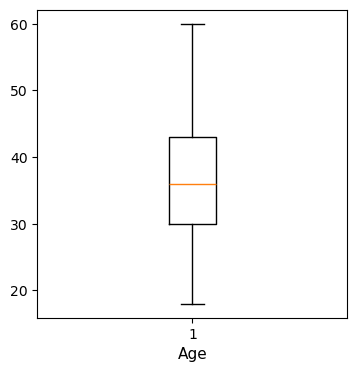

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60ebb6e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60ebb73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60ebb6bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60ebb7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60ebb7bb0>],
 'means': []}

Text(0.5, 0, 'DistanceFromHome')

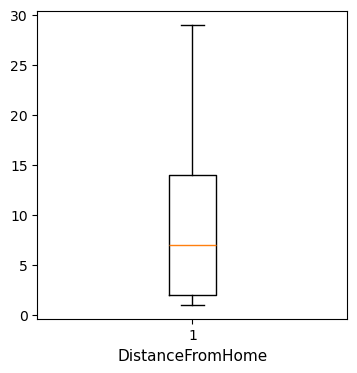

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60ca3e7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60ca3ed10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60ca3e530>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60ca3f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60ca3f4f0>],
 'means': []}

Text(0.5, 0, 'Education')

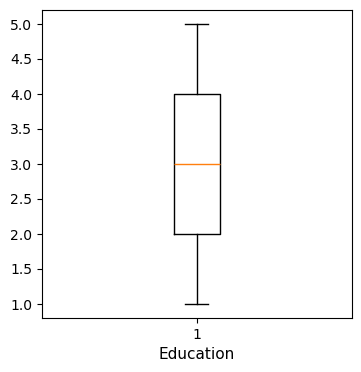

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60ca70430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60ca71de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60ca70d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60ca72290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60ca72530>],
 'means': []}

Text(0.5, 0, 'EnvironmentSatisfaction')

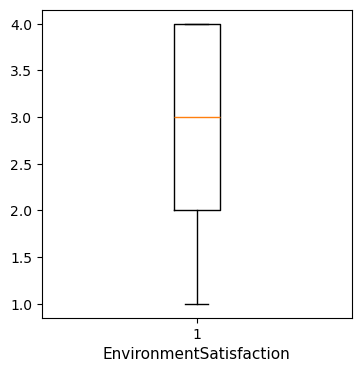

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60cad1060>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60cad15a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60cad0dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60cad1ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60cad1d80>],
 'means': []}

Text(0.5, 0, 'JobSatisfaction')

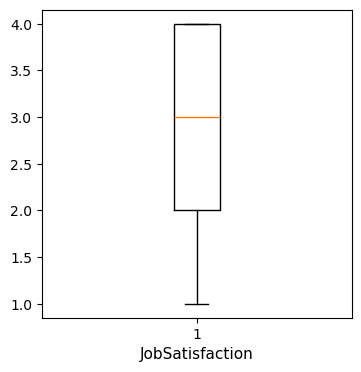

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60c9f3ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60c9f32e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60c9f2740>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60c9f0520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60c9f14e0>],
 'means': []}

Text(0.5, 0, 'MonthlyIncome')

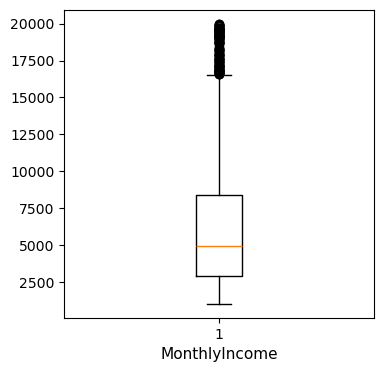

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60c93e9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60c93eef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60c93e830>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60c93f430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60c93f6d0>],
 'means': []}

Text(0.5, 0, 'NumCompaniesWorked')

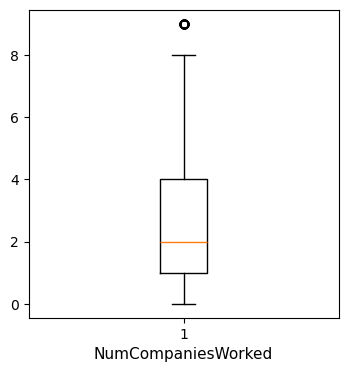

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60eb770a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60ca72140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60eb77640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60ca73d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60ca72b00>],
 'means': []}

Text(0.5, 0, 'WorkLifeBalance')

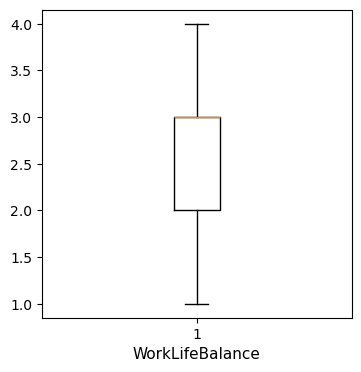

<Figure size 400x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc60c9a64a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc60c9a69e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc60c9a6200>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc60c9a6f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc60c9a71c0>],
 'means': []}

Text(0.5, 0, 'YearsAtCompany')

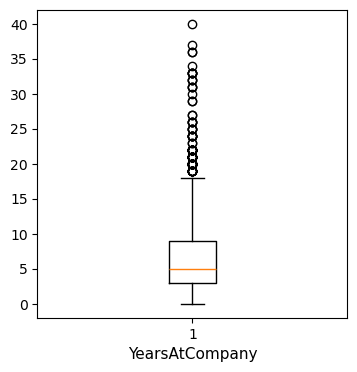

In [10]:
# Let's explore and find if there are any outliers in the dataset. Below code block will plot boxplot for each non-object
# feature in the dataset. Each boxplot is generated one by one.

for i in employee_data_df.columns.tolist():
    if employee_data_df[i].dtype != 'object':
        plt.figure(figsize=(4,4))
        plt.boxplot(employee_data_df[i])
        plt.xlabel(i, fontsize=11)
        plt.show()
    else:
        continue

NOTES: 

* Monthly income has lot of outliers. Clearly there is a set of employees who earn more than the usual salary earned by other (majoirty) employees. This can happen in any organization. As salary is function of various factors such as resource criticality, demand supply situation for a particular skill type.

* NumCompaniesWorked has few outliers indicating certain set of employees have changed organizations more frequently compared to the majority. This is employees changing more than 8 jobs. It is likely this particular feature has tight relationship with the target or response variable.

* YearsAtCompany - Again here a lot of outliers indicate a set of employees have been working with the company from much longer than usual tenture of the workforce. This could be the group of most loyal or satisfied employees. This situation can happen anywhere (in any organization) and hence shouldn't be considered noise.

In [11]:
# Outlier treatment
# Below function computes inter quartile range for a specific feature

def iqr(a):
    iqr = (np.percentile(a,75)-np.percentile(a,25))
    return iqr

In [12]:
# We can drop the outliers from the dataset uding below code.
# NOTE - This will remove all the rows from the employee_data_df where either of the three conditions are met. i.e. the remaining
# dataset will have no record/ observation where YearAtCompany > iqr(YearsatCompany)*3...Likewise for other features.

filter1 = employee_data_df['YearsAtCompany'] <= iqr(employee_data_df['YearsAtCompany'])*3
filter1.shape
filter2 = employee_data_df['MonthlyIncome'] <= iqr(employee_data_df['MonthlyIncome'])*3
filter1.shape
filter3 = employee_data_df['NumCompaniesWorked'] <= iqr(employee_data_df['NumCompaniesWorked'])*3
filter1.shape
filterF = filter1 & filter2 & filter3
filterF.shape
filterF

(1470,)

(1470,)

(1470,)

(1470,)

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Length: 1470, dtype: bool

In [13]:
employee_data_df_F = employee_data_df[filterF] # This line will drop all records where any of the filter is breached
employee_data_df_F.shape 


(1301, 13)

So there are 1470 - 1301 = 169 rows have been removed from the original dataframe. This is more than 1% of the total dataset.

In [14]:
# We can confirm that the outliers have been removed using describe() function on the new dataframe. Clearly max value for the
# features (where outlier were droped) is = 3*iqr for the feature.

employee_data_df_F.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,35.648732,9.251345,2.903920,2.715603,2.738663,5269.985396,2.651806,2.757879,5.722521
std,8.696262,8.057620,1.020931,1.087967,1.104935,3081.006342,2.489558,0.708591,4.001041
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,2.000000,2.000000,2783.000000,1.000000,2.000000,2.000000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,4523.000000,1.000000,3.000000,5.000000
75%,40.000000,14.000000,4.000000,4.000000,4.000000,6577.000000,4.000000,3.000000,8.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,16291.000000,9.000000,4.000000,18.000000


#### Find the age distribution of employees

<Figure size 1000x500 with 0 Axes>

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Employee Age')

([<matplotlib.axis.XTick at 0x7fc60ed0ef20>,
 [Text(18.0, 0, '18.0'),
  Text(20.1, 0, '20.1'),
  Text(22.2, 0, '22.2'),
  Text(24.3, 0, '24.3'),
  Text(26.4, 0, '26.4'),
  Text(28.5, 0, '28.5'),
  Text(30.6, 0, '30.6'),
  Text(32.7, 0, '32.7'),
  Text(34.8, 0, '34.8'),
  Text(36.9, 0, '36.9'),
  Text(39.0, 0, '39.0'),
  Text(41.1, 0, '41.1'),
  Text(43.2, 0, '43.2'),
  Text(45.3, 0, '45.3'),
  Text(47.4, 0, '47.4'),
  Text(49.5, 0, '49.5'),
  Text(51.6, 0, '51.6'),
  Text(53.7, 0, '53.7'),
  Text(55.8, 0, '55.8'),
  Text(57.9, 0, '57.9'),
  Text(60.0, 0, '60.0')])

Text(0, 0.5, 'Number of Employees')

Text(0.5, 1.0, 'Age distribution of employees')

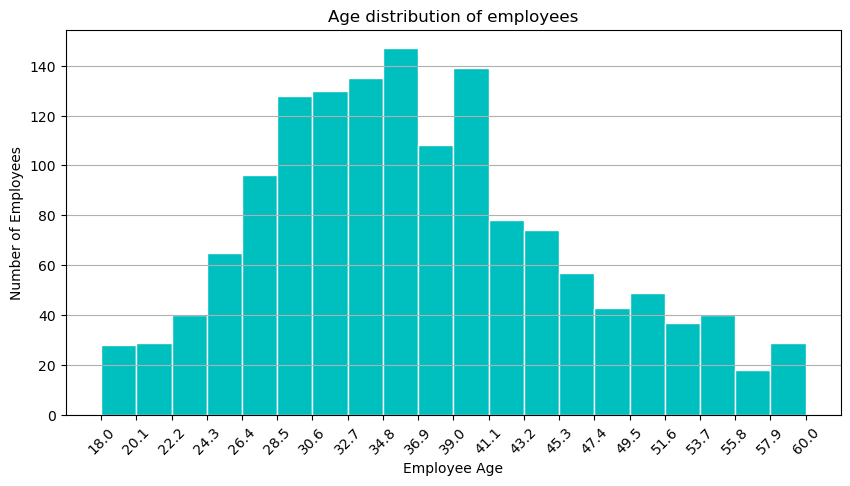

In [15]:
plt.figure(figsize=(10,5))
plt.style.use('default')  # This line is not required as 'default' style is anyway used
plt.hist(employee_data_df['Age'],bins=20,ec='w',align='mid', fc='c')
plt.xlabel('Employee Age', fontsize=10)
plt.xticks([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ], fontsize=10, rotation=45.3)
plt.ylabel('Number of Employees', fontsize=10)
plt.title('Age distribution of employees')
plt.grid(visible=True,which='both',axis='y')
plt.show()

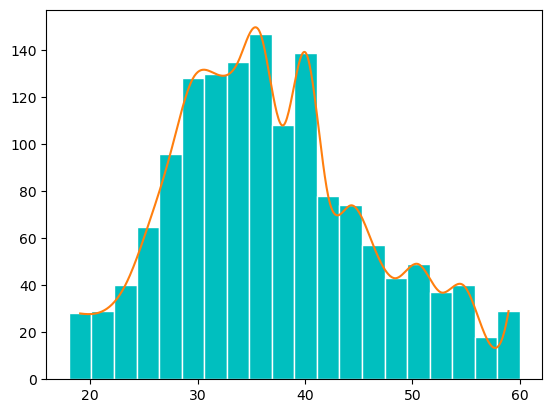

In [16]:
# Below code block plots a curve on top of histogram to show frequency distribution

freq, bin_endpoints, *Others = plt.hist(employee_data_df['Age'],bins=20,ec='w',fc='c',align='mid')
def x_for_density_plot(a):
    """ This function generates x values from the bin_endpoints available from the plt.hist(). """
    x = []
    for i in range(1,len(a)):
        x.append(round((a[i-1]+a[i])/2,2))
    return x

x_values = x_for_density_plot(bin_endpoints)

from scipy.interpolate import make_interp_spline
x_y_spline = make_interp_spline(x_values, freq)  # This computes the coefficients from x,y values for a smooth curve
x_new = np.linspace(np.array(x_values).min(), np.array(x_values).max(),500)  # This generates additional data points between x.min and x.max
y_new = x_y_spline(x_new)  # This is like transform operation in ML i.e using the coefficient and x_new values it computes y_new
plt.plot(x_new,y_new)  # This is standard matplotlib line plot with x_new and y_new

#### Explore Attrition by Age

In [17]:
# We can extract the relevant variables from the dataset for analysis
employee_data_df_slice1 = employee_data_df[['Age', 'Attrition']]
employee_data_df_slice1.head()

,Age,Attrition
0,41,Yes
1,49,No
2,37,Yes
3,33,No
4,27,No


In [18]:
# Let's do one hot encoding for Attrition

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), ['Attrition']), remainder='passthrough')
transformed = transformer.fit_transform(employee_data_df_slice1)
employee_data_df_slice1 = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
employee_data_df_slice1 = employee_data_df_slice1.iloc[:,1:3]
employee_data_df_slice1

,onehotencoder__Attrition_Yes,remainder__Age
0,1.0,41.0
1,0.0,49.0
2,1.0,37.0
3,0.0,33.0
4,0.0,27.0
...,...,...
1465,0.0,36.0
1466,0.0,39.0
1467,0.0,27.0
1468,0.0,49.0


In [19]:
# Let's compute the correlation between two variables

employee_data_df_slice1.corr()

,onehotencoder__Attrition_Yes,remainder__Age
onehotencoder__Attrition_Yes,1.000000,-0.159205
remainder__Age,-0.159205,1.000000


It is clear Age and Attrition have very weak correlation. Further these are -vely correlated i.e. As age increases employee is less likely to quit. However the relationship between two is not very strong.

In [20]:
# Check how many people attrite in the dataset left after the outliers are removed/ treated.

employee_data_df_slice1.onehotencoder__Attrition_Yes.sum()

237.0

In [21]:
# Check how many people attrite in the original dataset without removing the outliers

employee_data_df.groupby(by='Attrition').describe()

Age                                                    \
            count       mean      std   min   25%   50%   75%   max   
Attrition                                                             
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0   

          DistanceFromHome             ... WorkLifeBalance       \
                     count       mean  ...             75%  max   
Attrition                              ...                        
No                  1233.0   8.915653  ...             3.0  4.0   
Yes                  237.0  10.632911  ...             3.0  4.0   

          YearsAtCompany                                                 
                   count      mean       std  min  25%  50%   75%   max  
Attrition                                                                
No                1233.0  7.369019  6.096298  0.0  3.0  6.0  10.0  37.0  
Yes                237.0  5.130802  5.949984  0.0  1.0  3.0   7.0  40.0  

[2 rows x 72 columns]

So all the 237 observations were preserved even after outlier treatment

In [22]:
# To faciliate further analysis we can convert the numeric and continous feature 'Age' into categorical 'Age group' as below


def age_grp(a):
    age_group = []
    for i in a:
        if i <= 30:
            age_group.append('18-30')
        elif i <= 40:
            age_group.append('31-40')
        elif i <= 50:
            age_group.append('41-50')
        else:
            age_group.append('51-60')
    return age_group

employee_data_df['Age Group'] = pd.Series(age_grp(employee_data_df['Age']))
employee_data_df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age Group
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,41-50
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,41-50
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,31-40
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,31-40
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,31-40
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,31-40
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6,18-30
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9,41-50


In [23]:
df = employee_data_df[['Age Group', 'Attrition']].groupby(by=['Age Group', 'Attrition']).size().unstack().T
df
df.index.name = ''
df.columns.name = ''
df

Age Group,18-30,31-40,41-50,51-60
Attrition,,,,
No,286,534,288,125
Yes,100,85,34,18


,18-30,31-40,41-50,51-60
,,,,
No,286,534,288,125
Yes,100,85,34,18


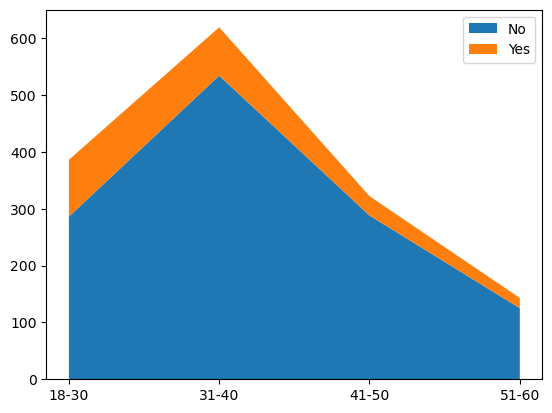

In [24]:
# Plotting a stakplot
plt.stackplot(df.columns.tolist(), df.iloc[0,:].values, df.iloc[1,:].values, labels= ('No', 'Yes'))
plt.legend(loc = 'best', fontsize = 10)

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Attrition')

Text(0.5, 1.0, 'Employee Attrition by Age Group')

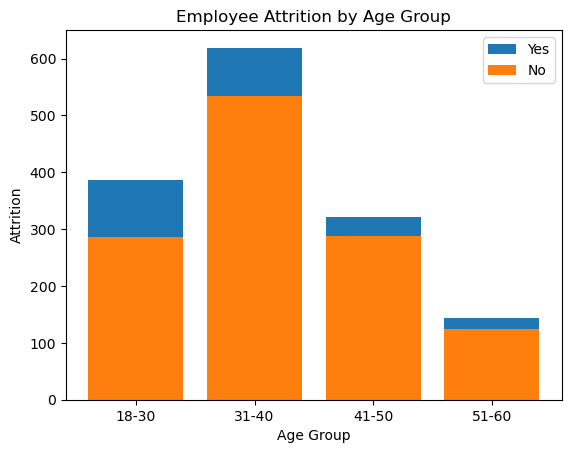

In [25]:
# Plotting a stacked bar chart. Note: This is nothing but two bar plots superimposed on each other

plt.bar(x=df.columns, height=(df.iloc[1,:] + df.iloc[0,:]), label='Yes')
plt.bar(x=df.columns, height=df.iloc[0,:],  label='No')
plt.xlabel('Age Group')
plt.ylabel('Attrition')
plt.title('Employee Attrition by Age Group')
plt.legend()

#### Explore data for left employees

In [26]:
# Below line of code will filter the rows where  Attrition == 'Yes' and returns the dataframe of employees who attrited

left_employees_data = employee_data_df[employee_data_df['Attrition'] == 'Yes']
left_employees_data.shape

# There ara 237 such employees in the dataset who attrited

(237, 14)

(array([10., 12.,  9., 13., 15., 32., 27., 23., 19., 12.,  8., 11.,  4.,
         8.,  7.,  4.,  7.,  5.,  3.,  8.]),
 array([18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42.,
        44., 46., 48., 50., 52., 54., 56., 58.]),
 <BarContainer object of 20 artists>)

(array([18., 89., 26., 23., 17., 12.,  9.,  6.,  5., 15.,  5.,  2.,  2.,
         3.,  0.,  0.,  0.,  0.,  1.,  4.]),
 array([ 1009. ,  1951.5,  2894. ,  3836.5,  4779. ,  5721.5,  6664. ,
         7606.5,  8549. ,  9491.5, 10434. , 11376.5, 12319. , 13261.5,
        14204. , 15146.5, 16089. , 17031.5, 17974. , 18916.5, 19859. ]),
 <BarContainer object of 20 artists>)

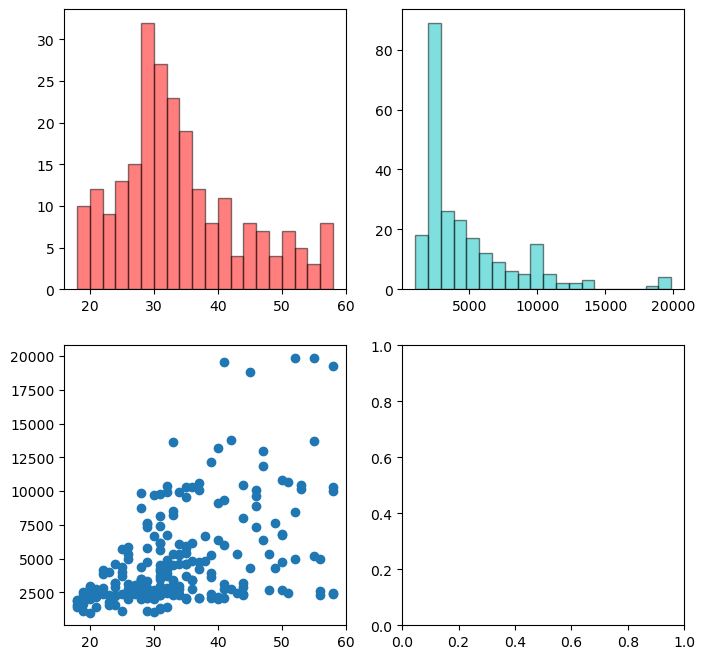

In [27]:
# Age, income, jobsatisfaction distribution of left employees:

fig, axes = plt.subplots(2,2, figsize = (8,8))
axes[0,0].hist(left_employees_data['Age'], bins=20, ec='black', fc='r', alpha = 0.5)
axes[0,1].hist(left_employees_data['MonthlyIncome'], bins=20, ec='black', fc='c', alpha = 0.5)
axes[1,0].scatter(x=left_employees_data['Age'],
                  y=left_employees_data['MonthlyIncome'])

In [28]:
### Exploring employee distribuion by EducationField

employee_data_df.groupby(by='EducationField').size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [29]:
### Creating a bar chart for the number of married and unmarried employees

employee_data_df.groupby(by='MaritalStatus').size()

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

#### Build up a logistic regression model to predict which employees are likely to attrite

In [30]:
# First check the dataset
employee_data_df.head()
employee_data_df.shape

# Drop the last column 'Age Group', as this is a derived feature (based no 'Age')

employee_data_df = employee_data_df.iloc[:,:-1]
employee_data_df.shape

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age Group
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,41-50
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,41-50
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,31-40
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,31-40
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,18-30


(1470, 14)

(1470, 13)

Before developing any prediction model, we need to do missing value treatment, outlier treatment, scaling (if required), feature engineering,feature extraction and other relevant operations

In [31]:
# Let's check the datatype of different variables
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [32]:
# We can use nested groupby() OR pivot() function to find different levels for the categorical features.
# There are 3 departments.
# 5 different levels of EducationField exist in the dataset.
# 3 different values of MaritalStatus are there.
# Similarly 2 distinct values of Attrition are there - Yes and No.

# employee_data_df.groupby(by=['Department', 'EducationField', 'MaritalStatus']).size()
employee_data_df.pivot_table(index=['Department', 'EducationField', 'MaritalStatus'], aggfunc='count')


Age  Attrition  \
Department             EducationField   MaritalStatus                   
Human Resources        Human Resources  Divorced         7          7   
                                        Married         18         18   
                                        Single           2          2   
                       Life Sciences    Divorced         5          5   
                                        Married          6          6   
                                        Single           5          5   
                       Medical          Divorced         2          2   
                                        Married          8          8   
                                        Single           3          3   
                       Other            Divorced         1          1   
                                        Married          1          1   
                                        Single           1          1   
                       Technical Degree Divorced         1          1   
                                        Married          1          1   
                                        Single           2          2   
Research & Development Life Sciences    Divorced       105        105   
                                        Married        195        195   
                                        Single         140        140   
                       Medical          Divorced        84         84   
                                        Married        166        166   
                                        Single         113        113   
                       Other            Divorced        15         15   
                                        Married         30         30   
                                        Single          19         19   
                       Technical Degree Divorced        20         20   
                                        Married         42         42   
                                        Single          32         32   
Sales                  Life Sciences    Divorced        24         24   
                                        Married         70         70   
                                        Single          56         56   
                       Marketing        Divorced        34         34   
                                        Married         77         77   
                                        Single          48         48   
                       Medical          Divorced        21         21   
                                        Married         36         36   
                                        Single          31         31   
                       Other            Divorced         3          3   
                                        Married          5          5   
                                        Single           7          7   
                       Technical Degree Divorced         5          5   
                                        Married         18         18   
                                        Single          11         11   

                                                       DistanceFromHome  \
Department             EducationField   MaritalStatus                     
Human Resources        Human Resources  Divorced                      7   
                                        Married                      18   
                                        Single                        2   
                       Life Sciences    Divorced                      5   
                                        Married                       6   
                                        Single                        5   
                       Medical          Divorced                      2   
                                        Married                       8   
                                        Single                        3   
                 

In [33]:
employee_data_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [34]:
employee_data_df.describe()

# NOTE that Education, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance features are nominal ordinal and have been
# rated/ ranked by the employees on different scales

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [35]:
# NOTE - Department, EducationField, MaritalStatus, Attrition are all nominal variables i.e. there is no meaningful order or
# ranking between different levels. Hence OneHotEncoding can be done. Let's apply OneHotEncoding first on the dataset.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categorical = ['Attrition', 'Department', 'EducationField', 'MaritalStatus']
for i in categorical:
    transformer = make_column_transformer(
        (OneHotEncoder(), [i]), remainder='passthrough')
    tranformed = transformer.fit_transform(employee_data_df)
    col_name = []
    for i in transformer.get_feature_names_out():
        if i[:10] == 'remainder_':
            col_name.append(i[11:])
        else:
            col_name.append(i)
    employee_data_df = pd.DataFrame(tranformed, columns=col_name)

In [36]:
# Let's confirm if the encoding has been done correctly or not.
employee_data_df.head()
employee_data_df.shape
employee_data_df.info()

,onehotencoder__MaritalStatus_Divorced,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__EducationField_Human Resources,onehotencoder__EducationField_Life Sciences,onehotencoder__EducationField_Marketing,onehotencoder__EducationField_Medical,onehotencoder__EducationField_Other,onehotencoder__EducationField_Technical Degree,onehotencoder__Department_Human Resources,...,onehotencoder__Attrition_Yes,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,41,1,2,2,4,5993,8,1,6
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,49,8,1,3,2,5130,1,3,10
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,37,2,2,4,3,2090,6,3,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33,3,4,4,3,2909,1,3,8
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,27,2,1,1,2,3468,9,3,2


(1470, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   onehotencoder__MaritalStatus_Divorced             1470 non-null   object
 1   onehotencoder__MaritalStatus_Married              1470 non-null   object
 2   onehotencoder__MaritalStatus_Single               1470 non-null   object
 3   onehotencoder__EducationField_Human Resources     1470 non-null   object
 4   onehotencoder__EducationField_Life Sciences       1470 non-null   object
 5   onehotencoder__EducationField_Marketing           1470 non-null   object
 6   onehotencoder__EducationField_Medical             1470 non-null   object
 7   onehotencoder__EducationField_Other               1470 non-null   object
 8   onehotencoder__EducationField_Technical Degree    1470 non-null   object
 9   onehotencoder__Department_Huma

So the number of rows remain unchanged and number of dimensions increased from 13 to 23

In [37]:
employee_data_df = employee_data_df.astype('int64')

In [38]:
employee_data_df.corr()

,onehotencoder__MaritalStatus_Divorced,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__EducationField_Human Resources,onehotencoder__EducationField_Life Sciences,onehotencoder__EducationField_Marketing,onehotencoder__EducationField_Medical,onehotencoder__EducationField_Other,onehotencoder__EducationField_Technical Degree,onehotencoder__Department_Human Resources,...,onehotencoder__Attrition_Yes,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
onehotencoder__MaritalStatus_Divorced,1.000000,-0.491506,-0.366691,0.012107,-0.002672,-0.007212,0.013316,0.005411,-0.019243,0.016037,...,-0.087716,0.033120,-0.005440,-0.002439,0.016439,-0.015197,0.032203,0.040824,-0.009080,0.025728
onehotencoder__MaritalStatus_Married,-0.491506,1.000000,-0.629981,0.057339,-0.017866,0.018491,-0.007139,-0.009171,0.002710,0.034767,...,-0.090984,0.083919,0.030232,-0.001865,-0.022180,-0.010315,0.056767,-0.016142,-0.006388,0.044925
onehotencoder__MaritalStatus_Single,-0.366691,-0.629981,1.000000,-0.072051,0.021469,-0.013323,-0.004249,0.004972,0.014265,-0.051443,...,0.175419,-0.119185,-0.027445,0.004168,0.009035,0.024571,-0.089361,-0.019161,0.014921,-0.070935
onehotencoder__EducationField_Human Resources,0.012107,0.057339,-0.072051,1.000000,-0.114559,-0.047637,-0.092899,-0.033248,-0.042964,0.646436,...,0.036466,0.001696,-0.002624,0.026479,-0.006898,-0.021467,0.021456,0.031007,-0.003967,-0.005146
onehotencoder__EducationField_Life Sciences,-0.002672,-0.017866,0.021469,-0.114559,1.000000,-0.291660,-0.568774,-0.203560,-0.263050,-0.068040,...,-0.032703,0.016824,-0.024499,0.013184,-0.024526,0.052004,-0.007054,-0.006131,-0.039728,-0.002019
onehotencoder__EducationField_Marketing,-0.007212,0.018491,-0.013323,-0.047637,-0.291660,1.000000,-0.236514,-0.084647,-0.109385,-0.073692,...,0.055781,0.038162,0.039294,0.072405,0.000479,-0.023528,0.062576,-0.018611,0.018500,0.031365
onehotencoder__EducationField_Medical,0.013316,-0.007139,-0.004249,-0.092899,-0.568774,-0.236514,1.000000,-0.165072,-0.213314,-0.049761,...,-0.046999,-0.006354,0.013486,-0.072335,-0.021299,-0.022645,0.001025,0.024826,0.001641,0.010805
onehotencoder__EducationField_Other,0.005411,-0.009171,0.004972,-0.033248,-0.203560,-0.084647,-0.165072,1.000000,-0.076343,-0.007527,...,-0.017898,-0.041466,-0.007969,0.038043,0.064602,0.003380,-0.022279,-0.012870,0.031812,-0.030331
onehotencoder__EducationField_Technical Degree,-0.019243,0.002710,0.014265,-0.042964,-0.263050,-0.109385,-0.213314,-0.076343,1.000000,-0.019469,...,0.069355,-0.027604,-0.014802,-0.026742,0.027713,-0.019795,-0.049695,-0.013819,0.021962,-0.021399
onehotencoder__Department_Human Resources,0.016037,0.034767,-0.051443,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469,1.000000,...,0.016832,0.020523,-0.012901,0.011435,-0.007597,-0.024068,0.006815,0.020618,0.047763,0.007944


Index(['onehotencoder__MaritalStatus_Divorced',
       'onehotencoder__MaritalStatus_Married',
       'onehotencoder__MaritalStatus_Single',
       'onehotencoder__EducationField_Human Resources',
       'onehotencoder__EducationField_Life Sciences',
       'onehotencoder__EducationField_Marketing',
       'onehotencoder__EducationField_Medical',
       'onehotencoder__EducationField_Other',
       'onehotencoder__EducationField_Technical Degree',
       'onehotencoder__Department_Human Resources',
       'onehotencoder__Department_Research & Development',
       'onehotencoder__Department_Sales', 'onehotencoder__Attrition_No',
       'onehotencoder__Attrition_Yes', 'Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

<Axes: >

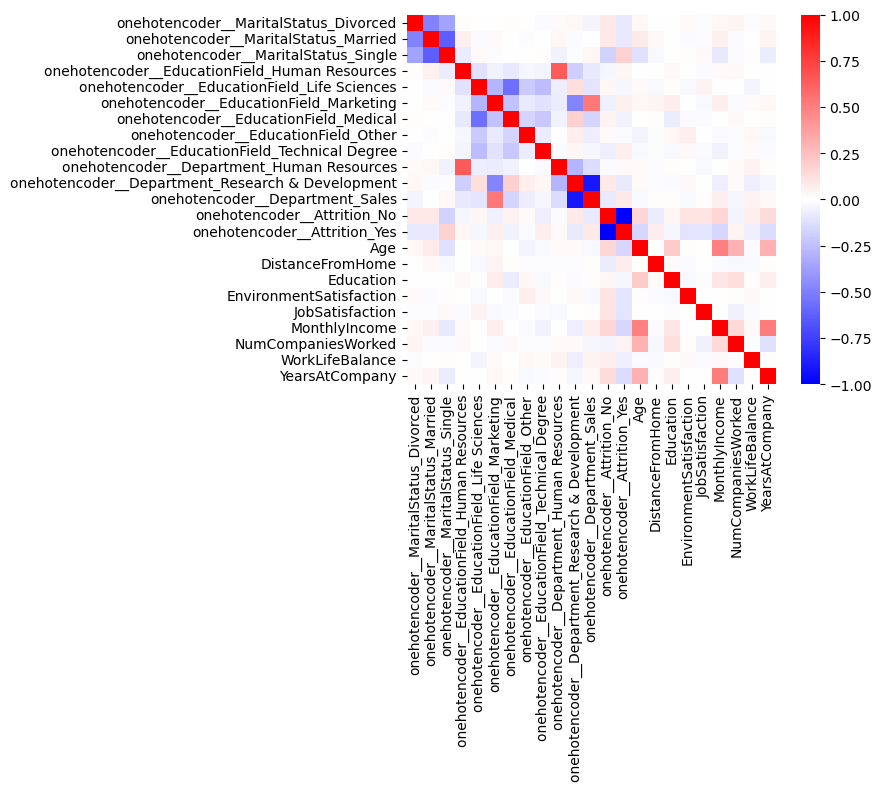

In [39]:
employee_data_df.columns
sns.heatmap(employee_data_df.corr(), square=True, cmap='bwr')

<Axes: >

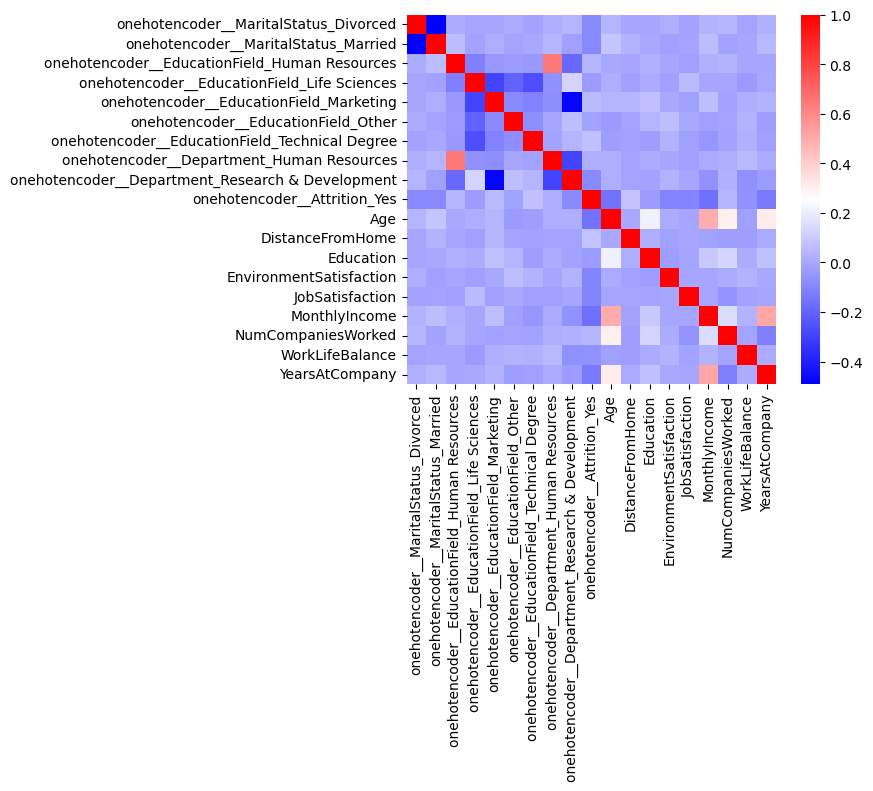

In [40]:
employee_data_df.drop(['onehotencoder__MaritalStatus_Single', 'onehotencoder__EducationField_Medical',
                       'onehotencoder__Department_Sales', 'onehotencoder__Attrition_No'], axis= 'columns', inplace=True)

sns.heatmap(employee_data_df.corr(), square=True, cmap='bwr')

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = employee_data_df.drop(['onehotencoder__Attrition_Yes'], axis='columns')
data.shape
target = employee_data_df['onehotencoder__Attrition_Yes']
target.shape

(1470, 18)

(1470,)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.3, random_state=25)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1029, 18)

(1029,)

(441, 18)

(441,)

In [43]:
lr1 = LogisticRegression() 

In [44]:
lr1.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = lr1.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8390022675736961


In [46]:
lr1.predict_proba(x_test)

array([[0.90842165, 0.09157835],
       [0.87071891, 0.12928109],
       [0.84996954, 0.15003046],
       [0.92624635, 0.07375365],
       [0.80191776, 0.19808224],
       [0.72155298, 0.27844702],
       [0.81739871, 0.18260129],
       [0.7680996 , 0.2319004 ],
       [0.93271127, 0.06728873],
       [0.87186385, 0.12813615],
       [0.89383346, 0.10616654],
       [0.90780062, 0.09219938],
       [0.5409358 , 0.4590642 ],
       [0.74474988, 0.25525012],
       [0.88608541, 0.11391459],
       [0.96876715, 0.03123285],
       [0.97984822, 0.02015178],
       [0.76229439, 0.23770561],
       [0.86549448, 0.13450552],
       [0.94363853, 0.05636147],
       [0.70276614, 0.29723386],
       [0.88829471, 0.11170529],
       [0.8212513 , 0.1787487 ],
       [0.92276801, 0.07723199],
       [0.67113785, 0.32886215],
       [0.90479972, 0.09520028],
       [0.87213818, 0.12786182],
       [0.78234195, 0.21765805],
       [0.74480198, 0.25519802],
       [0.9434018 , 0.0565982 ],
       [0.

In [47]:
# Let's apply Principal Component Analysis (PCA) and check if there is any improvement in the accuracy

from sklearn.decomposition import PCA
employee_pca = PCA(n_components= 0.95)
employee_pca.fit(x_train)
x_train_transformed = employee_pca.transform(x_train)
print(x_train_transformed.shape)
x_test_transformed = employee_pca.transform(x_test)
print(x_test_transformed.shape)

PCA(n_components=0.95)

(1029, 1)
(441, 1)


In [48]:
lr2 = LogisticRegression()

In [49]:
lr2.fit(x_train_transformed, y_train)
y_pred_transformed = lr2.predict(x_test_transformed)
accuracy_transformed = accuracy_score(y_pred_transformed,y_test)
print(accuracy_transformed)

LogisticRegression()

0.8412698412698413


In [50]:
print(y_pred_transformed)
probs = lr2.predict_proba(x_test_transformed)
print(probs)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.86157678 0.13842322]
 [0.76891721 0.23108279]
 [0.83072654 0.16927346]
 [0.95618232 0.04381768]
 [0.9

Though the accuracy has increased but the improvement is not significant

In [51]:
# Plotting roc_auc_score, classification report and the confusion matrix 

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, probs[:,1]))

0.6604158644589911


In [52]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred_transformed))
print(metrics.confusion_matrix(y_test,y_pred_transformed))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

[[371   0]
 [ 70   0]]
